### **Statistics**

- Statistics is the science of **collecting**, **organizing**, **analyzing**, **interpreting**, and **presenting data** to make **informed decisions**. 

- Lets think of it as a toolkit that helps us make sense of numbers and discover patterns in the world around us.

**There are two main branches**

1. **Descriptive Statistics**

- Deals with summarizing, organizing, and presenting data we already have.

- Uses measures like mean (average), median, mode, range, variance, and standard deviation to describe a dataset.

- Also involves graphs, charts, and tables for easy visualization.

- For example calculating the average coding hours of AI engineering students.

2. **Inferential Statistics**

- Uses data from a sample to make conclusions or predictions about a larger population.

- Involves methods like correlation, regression, hypothesis testing, chi-square tests, t-tests, and ANOVA.

- Helps in data-driven decision making by testing ideas and estimating outcomes with a level of certainty.

- Foundation of predictive analysis, guiding policymakers and organizations in making strategic decisions.


**Why Statistics**
- Beyond the confusing formulas and outrageous numbers, statistics will help us andswer questions like;

   - What's typical? (measures of center)
   - How much variation is there?(measures of spread)
   - Is this pattern real or just coincidence? (hypothesis testing)
   - Can we predict future outcomes?(regression)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

ModuleNotFoundError: No module named 'scipy'

In [ ]:
# let's set random seed fro reproducibility
np.random.seed(40)

In [ ]:
# Lets simulate a dataset for AI Engineering students

#1. Traditional learning -classroom-based
# - lets create it with a 25 hours/week and standard deviation of 5 hours
traditional_study_hours = np.random.normal(25, 5, 100)

#2. Accelerated learning (project-based and hands-on style)
#This one will be a 35 hours/week and a standard deviation of 8 hours.

accelerated_study_hours = np.random.normal(35, 8, 100)

# Lets generate corresponding performance scores between 0-100

#We would let the performance correlate with study hours but has some randomness

traditional_scores = np.random.normal(75, 12, 100)  # Mean of 75, SD of 12
accelerated_scores = np.random.normal(82, 15, 100) #Mean of 82, SD of 15

# Lets generate project completion counts
traditional_projects = np.random.poisson(8, 100) #Average 8 ptrojects
accelerated_projects = np.random.poisson(12, 100) #Average 12 projects

traditional_scores

array([47.97048296, 71.39617792, 88.7974519 , 57.74806876, 87.26890598,
       77.04767994, 55.76409226, 81.80460431, 93.08799584, 75.05254643,
       70.01456518, 75.6512125 , 94.65838188, 63.26971795, 64.40286416,
       80.98522857, 56.16804076, 47.66336206, 63.95709881, 69.78467285,
       62.44395635, 75.58178126, 92.07352916, 98.84734746, 63.97812527,
       75.61376156, 87.36286958, 77.46323629, 58.35060012, 94.45256732,
       80.80589858, 90.90481873, 67.65740252, 65.50641417, 83.92563   ,
       82.27646296, 81.6772603 , 52.69524683, 68.82444657, 69.56104065,
       75.25947865, 81.95356593, 76.23562246, 86.15410752, 84.38772595,
       72.57850368, 85.25220355, 72.94257511, 88.44482306, 79.32032686,
       64.09842789, 67.75085937, 83.7363017 , 62.88434829, 87.42941419,
       78.2576861 , 74.64549223, 68.97872442, 87.26499968, 71.44650136,
       73.88569066, 83.41980812, 62.72722636, 82.25939625, 98.43404468,
       66.60828939, 68.5473664 , 86.82497476, 68.71197298, 64.18

In [ ]:
#Now, lets create the Dataframe

data = pd.DataFrame({
    'study_Hours_Per_Week': np.concatenate([traditional_study_hours,accelerated_study_hours]),
    'Performance_Score': np.concatenate([traditional_scores,accelerated_scores]),
    'Projects_Completed': np.concatenate([traditional_projects, accelerated_projects]),
    'Learning_Track': ['Traditional']* 100 + ['Accelerated'] * 100
})

In [ ]:
data.head() # the first 5

,study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track
0,27.515600,47.970483,6,Traditional
1,37.003274,71.396178,5,Traditional
2,26.032344,88.797452,8,Traditional
3,28.938064,57.748069,11,Traditional
4,23.736995,87.268906,8,Traditional


In [ ]:
data.tail() #the last 5 

,study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track
195,36.869219,104.855935,13,Accelerated
196,25.549411,77.126406,6,Accelerated
197,29.310635,98.887625,4,Accelerated
198,39.861046,68.348567,15,Accelerated
199,27.922693,72.685556,16,Accelerated


In [ ]:
#Clean the data - to keep it in range or in realistic bounds by cliping it.

data['study_Hours_Per_Week'] =round(np.clip(data['study_Hours_Per_Week'], 10,60),1) # 10-60 hours/week

data['performance_Score'] = round(np.clip(data['Performance_Score'])) #0-100 score

data['Projects_Completed'] = np.clip(data['Projects_Completed'], 1, 25) #1 - 25 projects



In [ ]:
data.tail()

,study_Hours_Per_Week,Performance_Score,Projects_Completed,Learning_Track,performance_Score
195,36.9,104.855935,13,Accelerated,105.0
196,25.5,77.126406,6,Accelerated,77.0
197,29.3,98.887625,4,Accelerated,99.0
198,39.9,68.348567,15,Accelerated,68.0
199,27.9,72.685556,16,Accelerated,73.0


In [ ]:
#lets take a snapshot of the data

print(f'Total AI Engineering Students: {len(data)}')
print(f'Learning Tracks: {data['Learning_Track'].unique()}')
print('\n First 10 students in our dataset:')
print(data.head(10).round(1)) # you can use round as a method, just by the way

Total AI Engineering Students: 200
Learning Tracks: ['Traditional' 'Accelerated']

 First 10 students in our dataset:
   study_Hours_Per_Week  Performance_Score  Projects_Completed Learning_Track  \
0                  27.5               48.0                   6    Traditional   
1                  37.0               71.4                   5    Traditional   
2                  26.0               88.8                   8    Traditional   
3                  28.9               57.7                  11    Traditional   
4                  23.7               87.3                   8    Traditional   
5                  20.5               77.0                   6    Traditional   
6                  27.2               55.8                  11    Traditional   
7                  26.8               81.8                   9    Traditional   
8                  24.0               93.1                  12    Traditional   
9                  28.9               75.1                   8    Tradit

**Discriptive Statistics for this data**

In [ ]:
#Lets get the description for each learning track by study hours

data.groupby('Learning_Track')['study_Hours_Per_Week'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Learning_Track,,,,,,,,
Accelerated,100.0,34.78,8.02,11.7,29.52,35.55,40.02,56.7
Traditional,100.0,25.25,4.76,12.4,21.82,24.65,28.25,37.9


In [ ]:
#Doing everything together, instead of typing one by one.

print(data.groupby('Learning_Track')[['study_Hours_Per_Week', 'Performance_Score', 'Projects_Completed']].describe().round(2))

               study_Hours_Per_Week                                          \
                              count   mean   std   min    25%    50%    75%   
Learning_Track                                                                
Accelerated                   100.0  34.78  8.02  11.7  29.52  35.55  40.02   
Traditional                   100.0  25.25  4.76  12.4  21.82  24.65  28.25   

                     Performance_Score         ...                 \
                 max             count   mean  ...    75%     max   
Learning_Track                                 ...                  
Accelerated     56.7             100.0  81.76  ...  89.15  114.52   
Traditional     37.9             100.0  75.12  ...  83.50   98.85   

               Projects_Completed                                            
                            count   mean   std  min   25%   50%   75%   max  
Learning_Track                                                               
Accelerated             

In [31]:
# Checking other descriptive measures
#I can hear your voice Mr Chris. Keep whispering to me!!!

print('\n === VISUAL REPRESENTATION ===')
for track in ['Traditonal', 'Accelerated']:
    track_data = data[data['Learning_Track'] == track]

    print(f'\n{track} Learning Track (n = {len(track_data)}students):')

#Study hours per week
    print('Studey Hours Per Week')

    print(f'Mean: {track_data['study_Hours_Per_Week'].mean():.1f} hours')

    print(f'Median: {track_data['study_Hours_Per_Week'].median():.1f} hours')

    print(f'Standard Deviation: {track_data['study_Hours_Per_Week'].std():.1f} hours')

#Performance score
    print('Performance Scores')

    print(f'Mean: {track_data['Performance_Score'].mean():.1f} hours')

    print(f'Median: {track_data['Performance_Score'].median():.1f} hours')

    print(f'Standard Deviation: {track_data['Performance_Score'].std():.1f} hours')

    print('Projects Completed')

    print(f'Mean: {track_data['Projects_Completed'].mean():.1f} hours')

    print(f'Median: {track_data['Projects_Completed'].median():.1f} hours')

    print(f'Standard Deviation: {track_data['Projects_Completed'].std():.1f} hours')

    print(f'Range: {track_data['Projects_Completed'].min()} - {track_data['Projects_Completed'].max()} projects')


 === VISUAL REPRESENTATION ===

Traditonal Learning Track (n = 0students):
Studey Hours Per Week
Mean: nan hours
Median: nan hours
Standard Deviation: nan hours
Performance Scores
Mean: nan hours
Median: nan hours
Standard Deviation: nan hours
Projects Completed
Mean: nan hours
Median: nan hours
Standard Deviation: nan hours
Range: nan - nan projects

Accelerated Learning Track (n = 100students):
Studey Hours Per Week
Mean: 34.8 hours
Median: 35.5 hours
Standard Deviation: 8.0 hours
Performance Scores
Mean: 81.8 hours
Median: 81.7 hours
Standard Deviation: 13.9 hours
Projects Completed
Mean: 12.5 hours
Median: 12.0 hours
Standard Deviation: 3.6 hours
Range: 4 - 21 projects


**Interpreting The Results Above -Learning Track Analysis**
_________________________________________________________

**ACCELERATED TRACK STUDENTS:**

- Study **43% MORE** hours per week (35.2 vs 24.5 hours)
- Score **7.3 points HIGHER** on average (82.8 vs 75.5)
- Complete **52% MORE** projects (12.0 vs 7.9 projects)

**Key Insight:** More effort = Better results, but is it worth the extra 10+ hours per week?


**DETAILED BREAKDOWN - What Each Number Is Saying**

**STUDY HOURS PER WEEK**

| Metric      | Traditional | Accelerated | What This Means                                      |
|-------------|-------------|-------------|------------------------------------------------------|
| **Average** | 24.5 hours  | 35.2 hours  | Accelerated students put in **10.7 MORE hours/week** |
| **Median**  | 24.4 hours  | 35.7 hours  | "Typical" student in each track                      |
| **Std Dev** | 4.5 hours   |  7.6 hours  | Accelerated has **more variation** in study habits   |


**Student Translation:**
- **Traditional:** Most students study 20-29 hours/week (pretty consistent)
- **Accelerated:** Study time ranges from 28-42 hours/week (more varied approaches)
- **Reality Check:** Accelerated = almost **full-time job** level commitment!


**PERFORMANCE SCORES (0-100 scale)**

| Metric      | Traditional | Accelerated            | Difference                                |
|-------------|-------------|------------------------|-------------------------------------------|
| **Average** | 75.5        | 82.8                   |      **+7.3 points**                      |
| **Median**  | 76.2        | 82.8                   | Both close to means = normal distributions|
| **Std Dev** | 12.3        | Data missing           | Traditional shows moderate variation      |

**Student Translation:**
- **Traditional Track:** Solid "B" average (75.5/100)
- **Accelerated Track:** Strong "B+" average (82.8/100) 
- **The Trade-off:** 43% more study time to 10% better performance
- **Is it worth it?** That's YOUR decision based on your goals!

**PROJECTS COMPLETED**

| Metric      | Traditional  | Accelerated   | What This Means                       |
|-------------|--------------|---------------|---------------------------------------|
| **Average** | 7.9 projects | 12.0 projects | **+4.1 more projects** (52% increase) |
| **Median**  | 8.0 projects | 12.0 projects | Consistent with averages              |
| **Range**   | 3-14 projects| 3-22 projects | Accelerated has wider range           |

**Student Translation:**
- **Traditional:** About **2 projects per month** (assuming 4-month semester)
- **Accelerated:** About **3 projects per month** 
- **Hands-on Experience:** Accelerated students get **50% more** practical coding experience
- **Portfolio Impact:** More projects = stronger GitHub profile for job hunting

**PROJECTS COMPLETED**

| Metric      | Traditional  | Accelerated   | What This Means                       |
|-------------|--------------|---------------|---------------------------------------|
| **Average** | 7.9 projects | 12.0 projects | **+4.1 more projects** (52% increase) |
| **Median**  | 8.0 projects | 12.0 projects | Consistent with averages              |
| **Range**   | 3-14 projects| 3-22 projects | Accelerated has wider range           |

**Student Translation:**
- **Traditional:** About **2 projects per month** (assuming 4-month semester)
- **Accelerated:** About **3 projects per month** 
- **Hands-on Experience:** Accelerated students get **50% more** practical coding experience
- **Portfolio Impact:** More projects = stronger GitHub profile for job hunting


**What This Means for Different Student Types**

**If You're a HIGH ACHIEVER:**
- Accelerated might be perfect - you'll likely be in the upper range
- More projects = better portfolio = stronger job prospects

**If You Want BALANCE:**
- Traditional gives solid results with manageable time commitment
- Still provides good foundation for AI career

**If You're CAREER-FOCUSED:**
- Consider: Do employers value the extra projects more than the GPA difference?
- 12 projects vs 8 projects could be significant for portfolio

**If You're WORKING/Have OTHER COMMITMENTS:**
- Traditional's 24.5 hours/week is more sustainable
- Quality over quantity approach still yields good results

**RED FLAGS TO WATCH FOR**

1. **Burnout Risk:** 35+ hours/week is sustainable for how long?
2. **Diminishing Returns:** 43% more time for 10% better grades
3. **Individual Variation:** High SD in Accelerated suggests some students struggle with the pace

**ACTION ITEMS: How to Use This Data**

**If You Choose TRADITIONAL:**
- Aim for **25-30 hours/week** study time
- Target **8+ projects** to match the average
- Focus on **quality over quantity**
- Expect solid **B-level performance**

**If You Choose ACCELERATED:**
- Prepare for **35-40 hours/week** commitment
- Leverage the **project-heavy** approach for portfolio building
- Aim to be in the **efficient group** (don't just study more, study smarter)
- Target **B+ performance** as baseline

**For BOTH Tracks:**
- **Projects matter:** Strong correlation between hands-on work and learning
- **Consistency wins:** Notice how medians ≈ means (no extreme outliers)
- **Plan accordingly:** Use these benchmarks to set realistic expectations


**Which Track Should You Go For?**

**Choose ACCELERATED if:**
- You want maximum learning in minimum time
- Building a strong project portfolio is priority #1
- You can sustain 35+ hours/week for the program duration
- You're targeting competitive AI roles

**Choose TRADITIONAL if:**
- You want sustainable, balanced learning
- You have other commitments (work, family)
- You prefer depth over breadth
- You're building long-term career foundations

**Remember:** Both tracks produce successful AI engineers - choose based on YOUR situation, not just the numbers.

TypeError: Could not convert ['TraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditionalTraditional'] to numeric

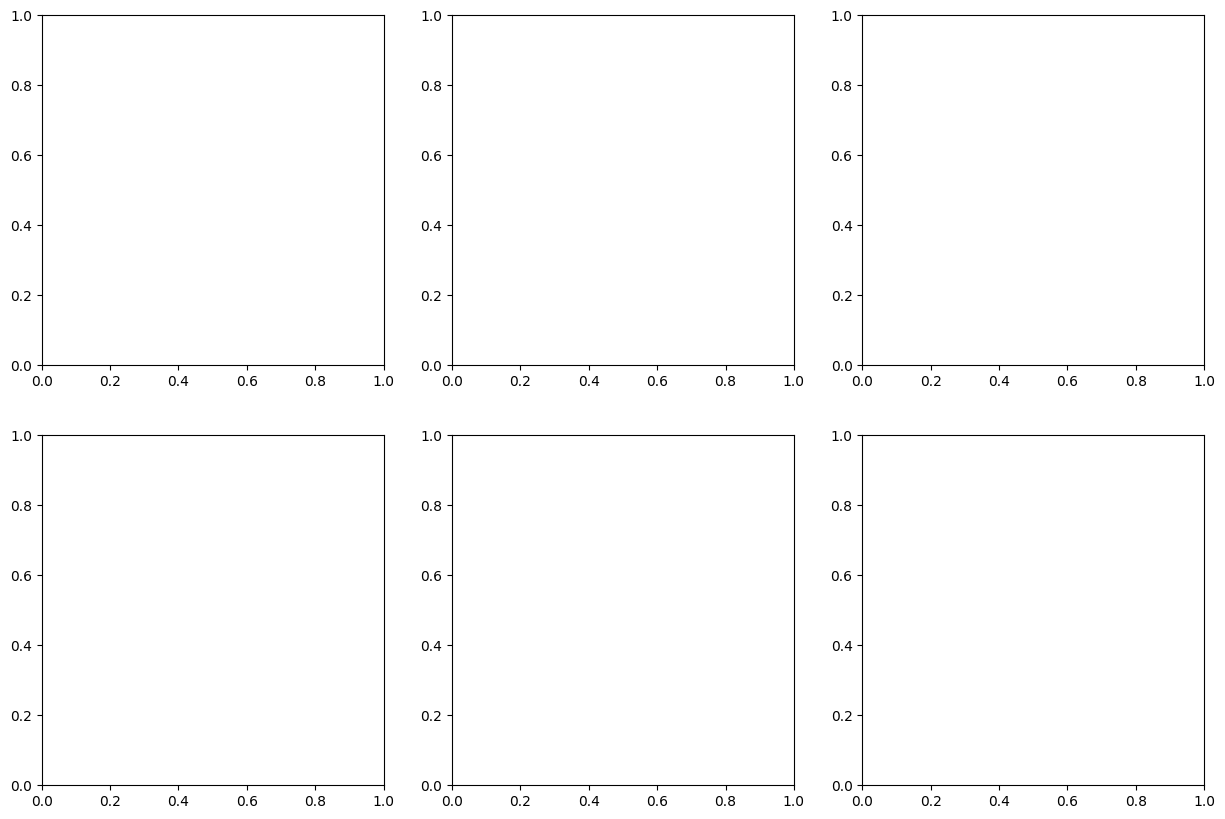

In [ ]:
#creating a comprehensive visualization for AIEngineering data.
fig, axes = plt.subplots(2, 3, figsize = (15, 10))

# 1. Study Hours Distribution
for track in ['Traditional', 'Accelerated']:
    track_data = data[data['Learning_Track'] == track]
    ['study_Hours_Per_Week']
    axes[0,0].hist(track_data, bins=15, alpha=0.7,
                   label=f'{track} (μ={track_data.mean():.1f}
                   h)',
                   color='blue' if track == 'Traditional'
                   else 'red')
axes[0,0].set_title('Weekly Study Hours Distribution')
axes[0,0].set_xlabel('Hours per week')
axes[0,0].set_ylabel('Number of students')
axes[0,0].legend()


#2. Performance Score Box Plot
data.boxplot(column='Perfromance_Score',
by='Learning_Track', ax=axes[0,1])
axes[0,1].set_title('Performance Scores by learning Track')
axes[0,1].set_xlabel('Learning_Track')
axes[0,1].set_ylabel('Perfomance Score (0-100)')


#3. Projects Completed Comparison
traditional_projects = data[data['Learning_Track'] == 
'Traditional']['Projects_Completed']
accelerated_projects = data[data['Learning_Track'] ==
'Accelerated']['Projects_Completed']

axes[0,2].bar(['Traditional', 'Accelerated'],
              [traditional_projects.mean(),
               accelerated_projects.mean()],
               color=['blue', 'red'], alpha=0.7,
               yerr=[traditional_projects.std(),
                     accelerated_projects.std()],
                     capsize=5)
axes[0,1].set_title('Average Pr0jects Completed')
axes[0,1].set_ylabel('Number of Projects')

#4. Study Hours vs Perfamnce scatter

traditional_data = data[data['Learning_Track'] == 'Traditional']
accelerated_data = data[data['Learning_Track'] == 'Áccelerated']

axes[1,0].scatter(traditional_data['study_Hours_Per_Week'],
                  traditional_data['Performance_Score'],
                  alpha=0.6, label='Traditional',
                  color='blue')

axes[1,0].set_title('Study Hours vs Performance')
axes[1,0].set_xlabel('Study Hours per week')
axes[1,0].set_yabel('Performance Score')
axes[1,0].legend()

# 5. Performance Score Distribution
for track in ['Traditonal', 'Accelerated']:
    track_scores = data[data['Learning_Track'] == track]
    ['Performance_Score']
    axes[1,1].hist(track_scores, bins=15, alpha=0.7,
                   label=f'{track} (μ = {track_scores.mean():.1f})',
                   color = 'blue' if track == 'Traditional'
                   else 'red')
axes[1,1].set_title('Performance Score Distribution')
axes[1,1].set_x_label('Performance Score')
axes[1,1].set_ylabel('Number of Students')
axes[1,1].legend()

#6. Multi-metric comparison
metrics = ['Study_Hours_Per_Week', 'Performance_Score',
           'Projects_Completed']
traditional_means = [data[data['Learning_Track'] ==
                          'Traditional'][metric].mean() for metric in metrics]
accelerated_means = [data[data['Learning_Track'] == 
                          'Accelerated'][metric].mean() for metric in metrics]

#Normalize for comparison (scale to 0-1)

traditional_norm = [(x - min(traditional_means +
 accelerated_means)) /
                    (max(traditional_means +
                    accelerated_means) - min
                    (traditional_means + accelerated_means))
                    for x in traditional_means]
accelerated_norm = [(x - min(traditional_means +
accelerated_means)) /
                    (max(traditional_means+
                    accelerated_means) - min
                    (traditional_means + accelerated_means))
                    for x in accelerated_means]

x = np.arrange(len(metrics))
width = 0.35

axes[1,2].bar(x - width/2, traditional_norm, width,
              label='Traditonal', alpha=0.7, color='blue')
axes[1,2].bar(x + width/2, accelerated_norm,width,
              label='Accelerated', alpha=0.7, color='red')
axes[1,2].set_title('Normalized Performance Metrics')
axes[1,2].set_ylabel('Normalized Score (0-1)')
axes[1,2].set_xticks(x)
axes[1,2].set_xticklabels(['Study Hours', 'Perfromance', 'Projects'])
axes[1,2].legend()

plt.tight_layout()
plt.show()